### Adapted from previous coursework
### Background

The objective of this exercise is to write a script containing 2 functions to simulate genetic drift and the plot the results.
Genetic drift is the change in the frequency of an (gene variant) in a population over multiple generations. An individual’s alleles are a sample of those in present their parents and chance has a role in determining whether that individual will survive and reproduce. Genetic drift may cause gene variants to disappear completely from a population and thereby reduce genetic variation. The exercise will simulate two simple genetic drift models.

---

    


### Task 1

Write a function that creates a population of size 100, half of which have allele ‘A’ and half which have allele ‘B’. This can be created as a list with 50 ‘A’ and 50 ‘B’. This list will represent the initial population.
The script should then complete 1000 generations using the following rules:

    • With each generation an allele from the current population list should be randomly selected and added to a new list representing the new population.
 
    • The random selection should occur the same number of times as the population size (100) so that the new and original populations are the same size.
    
    • Note that this means that some alleles may reproduce more than once and others may not reproduce at all.

    • If either of the alleles is completely lost from the population then no further generations should be completed.

The script also needs to produce a plot that shows the change in allele frequency with each generation, up to the 1000 generations or when either one was lost. The plot should be produced once, when all of the generations have been completed and display both alleles. 

Ensure that the plot is labelled appropriately.



--- 0.062256813049316406 seconds ---


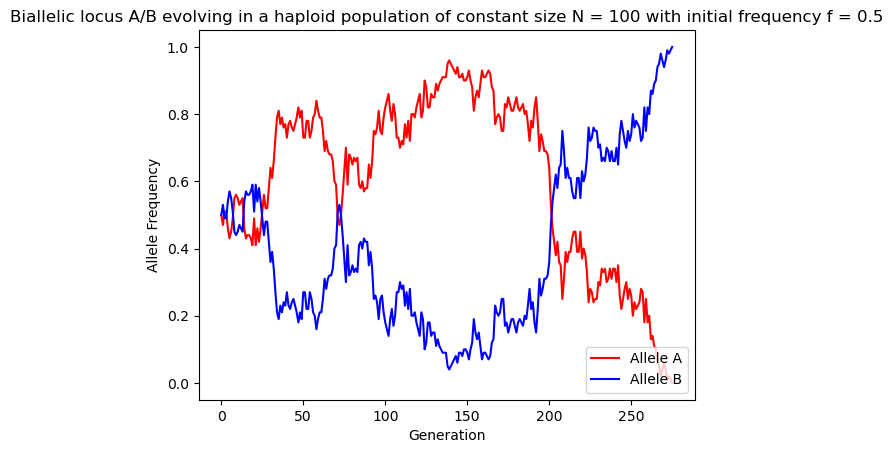

[0.5, 0.47, 0.51, 0.51, 0.46, 0.43, 0.45, 0.49, 0.55, 0.56, 0.55, 0.53, 0.54, 0.55, 0.46, 0.43, 0.44, 0.44, 0.43, 0.41, 0.49, 0.41, 0.46, 0.42, 0.46, 0.51, 0.56, 0.52, 0.52, 0.58, 0.64, 0.61, 0.66, 0.73, 0.79, 0.81, 0.77, 0.79, 0.76, 0.77, 0.73, 0.77, 0.78, 0.76, 0.75, 0.77, 0.79, 0.82, 0.79, 0.81, 0.73, 0.73, 0.78, 0.78, 0.73, 0.75, 0.79, 0.8, 0.84, 0.81, 0.79, 0.79, 0.75, 0.69, 0.72, 0.69, 0.68, 0.68, 0.66, 0.6, 0.59, 0.49, 0.47, 0.5, 0.56, 0.63, 0.7, 0.59, 0.68, 0.67, 0.65, 0.67, 0.66, 0.67, 0.59, 0.58, 0.6, 0.57, 0.58, 0.58, 0.65, 0.61, 0.66, 0.75, 0.74, 0.76, 0.81, 0.75, 0.74, 0.79, 0.82, 0.84, 0.86, 0.81, 0.78, 0.83, 0.8, 0.73, 0.73, 0.7, 0.72, 0.71, 0.77, 0.73, 0.78, 0.72, 0.8, 0.8, 0.79, 0.82, 0.84, 0.86, 0.79, 0.81, 0.9, 0.88, 0.82, 0.82, 0.86, 0.85, 0.85, 0.89, 0.87, 0.89, 0.9, 0.91, 0.91, 0.91, 0.95, 0.96, 0.95, 0.94, 0.93, 0.92, 0.94, 0.91, 0.91, 0.92, 0.9, 0.9, 0.91, 0.93, 0.9, 0.88, 0.81, 0.85, 0.87, 0.85, 0.89, 0.93, 0.91, 0.91, 0.92, 0.93, 0.92, 0.88, 0.87, 0.77, 0.79, 

In [94]:
import time #to benchmark
start_time = time.time()

from pylab import * #for plotting


def run_simulation(max_generations:int,init_pop:list): #function will return allele frequencies for plotting
    #we will store the allele frequencies at the end of each generation in allele_freq_a or allele_freq_b
    allele_freq_a=[0.5] #initial frequency
    allele_freq_b=[0.5] #initial frequency
    old_pop=init_pop #population before sampling
    new_pop=[] #population after sampling
    for i in range(0,max_generations):
        #first we will generate the indices to sample from
        rand_indices=[randint(1,100) for x in range(0,100)]
        #now we will populate new_pop with old_pop as defined by these indices
        new_pop=[old_pop[x-1] for x in rand_indices]
        #now we will calculate allele frequencies
        allele_freq_a.append(new_pop.count("A")/100)
        allele_freq_b.append(new_pop.count("B")/100)
        #saving the new population for the next iteration
        old_pop=new_pop
        new_pop=[]
        if i>max_generations or allele_freq_a[-1]==1 or allele_freq_a[-1]==0 : 
            #conditions to end simulation are n_generations=500 or one of the alleles fixing
            generation_no=list(range(0,len(allele_freq_a)))
            break #exit loop
    return [allele_freq_a,allele_freq_b,generation_no] #save data

#initialising
popsize=100 #size of population
pop_list = [] #initial population containing 50 A alleles and 50 B alleles
for i in range(0,int(popsize/2)): #popsize/2 because each allele contributes half of the population
    pop_list.append('A')
    pop_list.append('B')


allele_freq_a,allele_freq_b,generation_no= run_simulation(max_generations=1000,init_pop=pop_list) #run simulation, saving variables
print("--- %s seconds ---" % (time.time() - start_time))


#plotting 
plot(generation_no, allele_freq_a, 'r', label="Allele A")
plot(generation_no, allele_freq_b, 'b', label="Allele B")   

xlabel("Generation")
ylabel("Allele Frequency") 
title("Biallelic locus A/B evolving in a haploid population of constant size N = 100 with initial frequency f = 0.5") 
legend(loc='lower right')

show()


---
### Task 2 (50%)

Write a second function that has 2 alleles for a gene ‘A’ present in each individual. The alleles are ‘A’ and ‘a’ and the individuals are either ‘AA’, ‘Aa’ or ‘aa’.

The population size will again be 100.

The initial population has an even distribution of alleles so 25% are “AA”, 50% “Aa” (25% ‘Aa’ and 25% ‘aA’) and 25% “aa”.

An evolutionary event has occurred that means only 80% of ‘aa’ individuals will survive to maturity to breed, which needs to be accommodated in the script. However, the population size will remain static at 100 after each generation.

With each generation one allele from each random individual should be combined with one allele from another random individual to create a new population of 100. As ‘aa’ is only 80% successful it means that in the new population you should only include 80% of those created, so 1 in 5 of the aa you create should be rejected and a new individual created in its place. However, make sure that the final population size after each generation is still 100. 

An individual cannot breed with itself.

Run the simulation for a maximum of 500 generations or until allele “a” disappears from the population, at which point it should stop. 

Finally, draw a plot of ‘AA’, ‘Aa’, and ‘aa’.


--- 0.010801553726196289 seconds ---


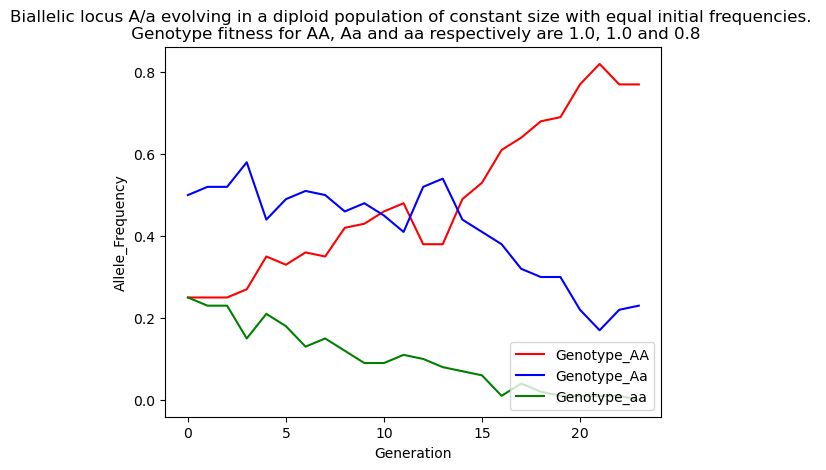

In [97]:
import time #for benchmarking
start_time = time.time()
from pylab import * #for plotting

#for each individual we will store one allele in chromosome 1 and one allele in chromosome 2    
def diploid_simulation(max_generations:int,init_pop:list): 
    #defining simulation function , will return allele frequencies for plotting
    old_pop=init_pop
    new_pop=[]
    allele_freq_AA=[.25] #initial allele frequencies
    allele_freq_Aa=[.50]
    allele_freq_aa=[.25]
   
    for i in range(0,max_generations): #for each generation
        #chromosome 1 is taken as the first allele of each parent
        chromosome_1=[old_pop[i][0] for i in range(0,len(old_pop))] 
        #similarly for chromosome 2
        chromosome_2=[old_pop[i][1] for i in range(0,len(old_pop))]
        #now generating the indices of each parent
        parent_1=[randint(0,100) for x in range(0,len(old_pop))] 
        parent_2=[randint(0,100) for x in range(0,len(old_pop))]

        j=0
        while j <100: #j is each offspring for each generation
            #combine each parent
            #first checking if selfing is occuring
            if parent_1[j]==parent_2[j]:
                parent_1[j]=randint(0,100)
                parent_2[j]=randint(0,100)
                next #if so skip to the next iteration without updating j
            if parent_1[j]!=parent_2[j]: #if parents are not same
                child=chromosome_1[parent_1[j]]+chromosome_2[parent_2[j]] #child genotype
                if child=="aa": 
                    survival=uniform(0,1) #generate random number, 80% of the time aa succesfully reproduces
                    #20% of the time we move onto the next iteration without updating j.
                    if survival>0.8: #aa offspring dies before reproducing.
                        parent_1[j]=randint(0,100)
                        parent_2[j]=randint(0,100)
                        next
                    if survival<0.8: #aa offspring surives.
                        new_pop.append(child)
                        j+=1
                if child!="aa": #other genotypes reproduce succesfully.
                    new_pop.append(child)
                    j+=1
        #saving allele frequencies            
        allele_freq_AA.append(new_pop.count("AA")/100)
        allele_freq_Aa.append(new_pop.count("Aa")/100+new_pop.count("aA")/100) 
        #make sure to count both heterozygotes together
        allele_freq_aa.append(new_pop.count("aa")/100)
        #saving the new population for the next iteration
        old_pop=new_pop
        new_pop=[]
        if i>max_generations or allele_freq_aa[-1]==0: 
            #conditions for ending the simulation are dropping of aa or more than 500 generations elapsing.
            generation_no=list(range(0,len(allele_freq_aa)))
            break #exit simulation
        
    return [allele_freq_AA,allele_freq_Aa,allele_freq_aa,generation_no]

#initialising population
init_pop=[]
popsize=100 #size of population
for i in range(0,int(popsize/4)): #popsize/2 because each allele contributes half of the population
    init_pop.append("AA")
    init_pop.append("Aa")
    init_pop.append("aA")
    init_pop.append("aa")

#running simulation
allele_freq_AA,allele_freq_Aa,allele_freq_aa,generation_no= diploid_simulation(max_generations=500,init_pop=init_pop)
print("--- %s seconds ---" % (time.time() - start_time))

#plotting
plot(generation_no, allele_freq_AA, 'r', label="Genotype_AA")
plot(generation_no, allele_freq_Aa, 'b', label="Genotype_Aa")   
plot(generation_no, allele_freq_aa, 'g', label="Genotype_aa")   

xlabel("Generation")
ylabel("Allele_Frequency")   
title("Biallelic locus A/a evolving in a diploid population of constant size with equal initial frequencies. \n Genotype fitness for AA, Aa and aa respectively are 1.0, 1.0 and 0.8")    
legend(loc='lower right')       

show()